**Data Loading**

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Load the dataset
print("📥 LOADING IRIS DATASET...")
print("="*50)
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head(5)

📥 LOADING IRIS DATASET...


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display basic info
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\n" + "="*50)


📊 Dataset Shape: (150, 6)
📋 Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



**Complete Exploratory Data Analysis (EDA)**

In [5]:
# Display complete dataset info
print("📋 DATASET INFORMATION:")
df.info()

📋 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:

print("\n📊 DESCRIPTIVE STATISTICS:")
df.describe()


📊 DESCRIPTIVE STATISTICS:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print("\n🌼 SPECIES DISTRIBUTION:")
species_counts = df['Species'].value_counts()
print(species_counts)
print(f"\n• Total Samples: {len(df)}")
print(f"• Number of Species: {len(species_counts)}")
print(f"• Species: {', '.join(species_counts.index.tolist())}")


🌼 SPECIES DISTRIBUTION:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

• Total Samples: 150
• Number of Species: 3
• Species: Iris-setosa, Iris-versicolor, Iris-virginica


In [8]:

print("\n🧮 DATA TYPES:")
df.dtypes


🧮 DATA TYPES:


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
print("\n🔍 CHECKING FOR MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values found!")


🔍 CHECKING FOR MISSING VALUES:
✅ No missing values found!


In [10]:
print("\n🔍 CHECKING FOR DUPLICATES:")
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")


🔍 CHECKING FOR DUPLICATES:
Duplicates found: 0


**Statistical Analysis by Species**

In [11]:
# Group by species for statistical analysis
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

print("📊 MEASUREMENTS BY SPECIES:")
for col in numeric_cols:
    print(f"\n{col}:")
    stats_by_species = df.groupby('Species')[col].agg(['mean', 'median', 'std', 'min', 'max'])
    print(stats_by_species.round(2))

📊 MEASUREMENTS BY SPECIES:

SepalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      5.01     5.0  0.35  4.3  5.8
Iris-versicolor  5.94     5.9  0.52  4.9  7.0
Iris-virginica   6.59     6.5  0.64  4.9  7.9

SepalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      3.42     3.4  0.38  2.3  4.4
Iris-versicolor  2.77     2.8  0.31  2.0  3.4
Iris-virginica   2.97     3.0  0.32  2.2  3.8

PetalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      1.46    1.50  0.17  1.0  1.9
Iris-versicolor  4.26    4.35  0.47  3.0  5.1
Iris-virginica   5.55    5.55  0.55  4.5  6.9

PetalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      0.24     0.2  0.11  0.1  0.6
Iris-versicolor  1.33     1.3  0.20  1.0  1.8
Iris-virginica   2.03     2.0  0.27  

In [12]:
print("\n📏 RANGE ANALYSIS:")
for col in numeric_cols:
    print(f"\n{col}:")
    range_by_species = df.groupby('Species')[col].agg(lambda x: f"{x.min():.1f} - {x.max():.1f}")
    print(range_by_species)


📏 RANGE ANALYSIS:

SepalLengthCm:
Species
Iris-setosa        4.3 - 5.8
Iris-versicolor    4.9 - 7.0
Iris-virginica     4.9 - 7.9
Name: SepalLengthCm, dtype: object

SepalWidthCm:
Species
Iris-setosa        2.3 - 4.4
Iris-versicolor    2.0 - 3.4
Iris-virginica     2.2 - 3.8
Name: SepalWidthCm, dtype: object

PetalLengthCm:
Species
Iris-setosa        1.0 - 1.9
Iris-versicolor    3.0 - 5.1
Iris-virginica     4.5 - 6.9
Name: PetalLengthCm, dtype: object

PetalWidthCm:
Species
Iris-setosa        0.1 - 0.6
Iris-versicolor    1.0 - 1.8
Iris-virginica     1.4 - 2.5
Name: PetalWidthCm, dtype: object


**Advanced Data Visualization**


📊 VISUALIZING DATA DISTRIBUTIONS


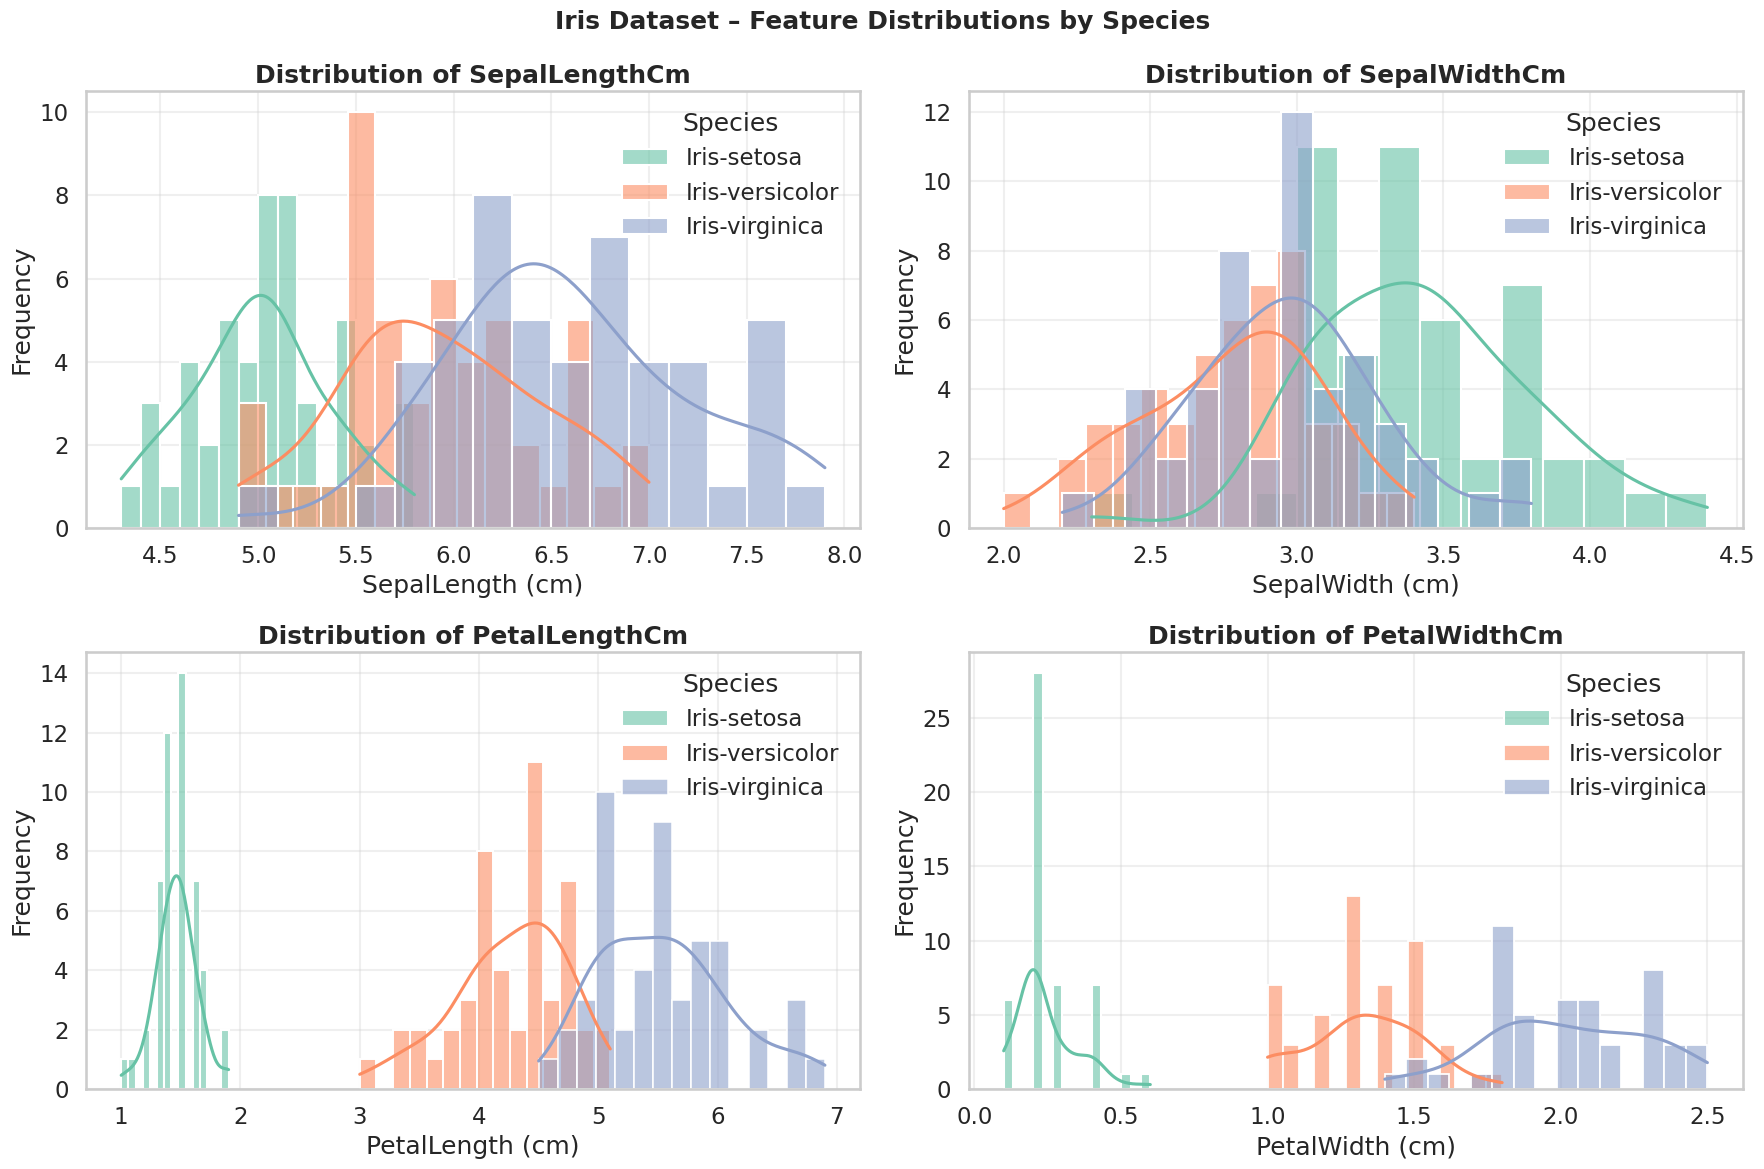

In [22]:
print("\n📊 VISUALIZING DATA DISTRIBUTIONS")
print("=" * 50)

plt.figure(figsize=(18, 12))
plt.suptitle('Iris Dataset – Feature Distributions by Species',
             fontsize=18, fontweight='bold')

for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    for species in df['Species'].unique():
        sns.histplot(
            df[df['Species'] == species][feature],
            kde=True,
            bins=15,
            alpha=0.6,
            label=species
        )
    
    plt.title(f'Distribution of {feature}', fontweight='bold')
    plt.xlabel(feature.replace('Cm', ' (cm)'))
    plt.ylabel('Frequency')
    plt.legend(title='Species')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


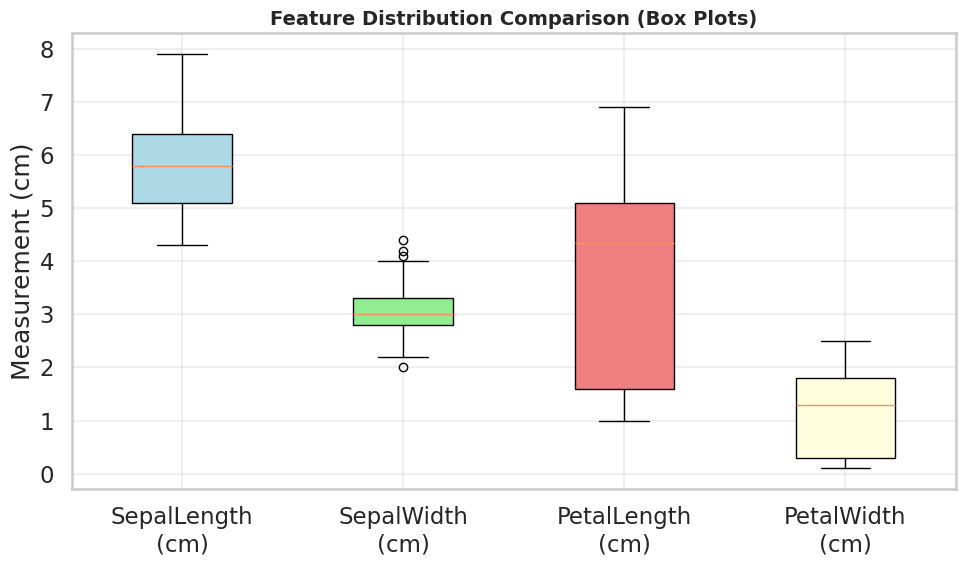

In [23]:
#Box plots by species
plt.figure(figsize=(10, 6))

box_data = []
labels = []

for feature in numeric_cols:
    box_data.append(df[feature].values)
    labels.append(feature.replace('Cm', '\n(cm)'))

bp = plt.boxplot(
    box_data,
    labels=labels,
    patch_artist=True
)

# Apply colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Feature Distribution Comparison (Box Plots)',
          fontsize=14, fontweight='bold')
plt.ylabel('Measurement (cm)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

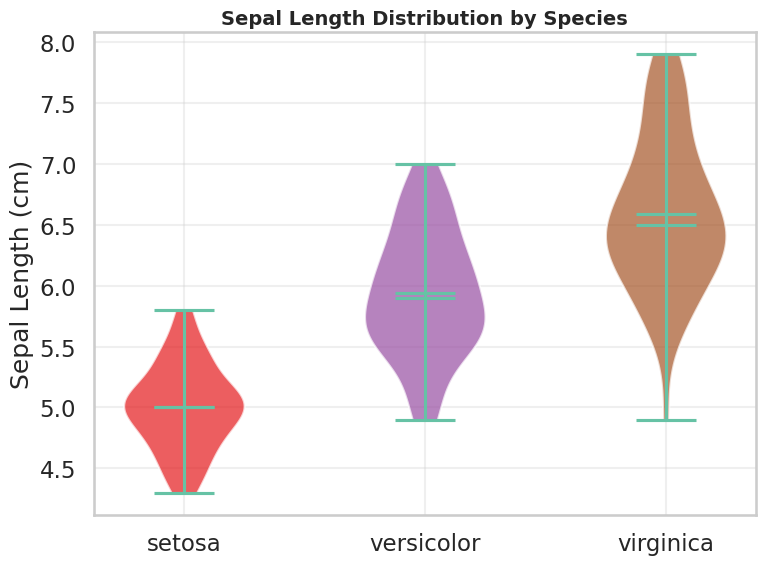

In [24]:
#Violin plots
plt.figure(figsize=(8, 6))

violin_data = []
violin_labels = []

for species in df['Species'].unique():
    violin_data.append(
        df[df['Species'] == species]['SepalLengthCm'].values
    )
    violin_labels.append(species.replace('Iris-', ''))

parts = plt.violinplot(
    violin_data,
    showmeans=True,
    showmedians=True
)

# Color violins
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(plt.cm.Set1(i / len(violin_data)))
    pc.set_alpha(0.7)

plt.xticks(
    ticks=np.arange(1, len(violin_labels) + 1),
    labels=violin_labels
)

plt.title('Sepal Length Distribution by Species',
          fontsize=14, fontweight='bold')
plt.ylabel('Sepal Length (cm)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

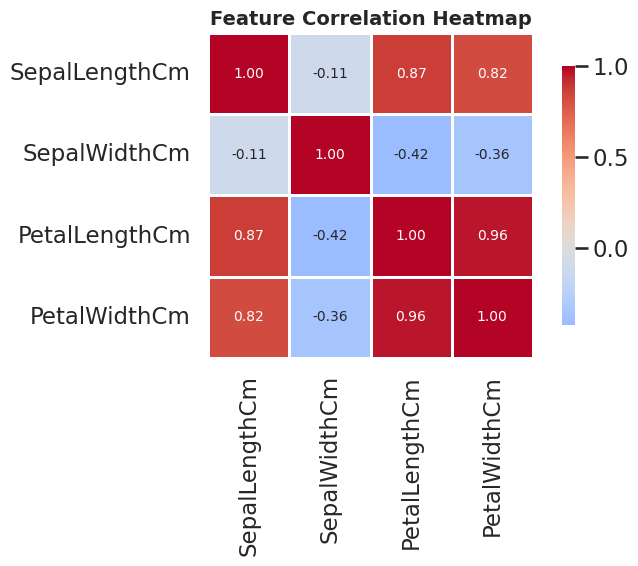

In [25]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    annot_kws={'size': 10}
)

plt.title('Feature Correlation Heatmap',
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

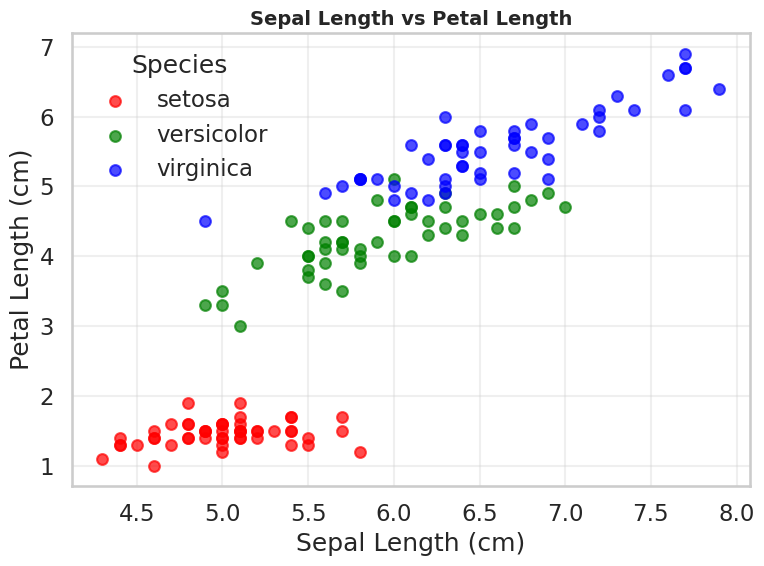

In [26]:
#Pairwise scatter plots
plt.figure(figsize=(8, 6))

colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(
        species_data['SepalLengthCm'],
        species_data['PetalLengthCm'],
        alpha=0.7,
        s=60,
        label=species.replace('Iris-', ''),
        color=colors.get(species, 'gray')
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length',
          fontsize=14, fontweight='bold')
plt.legend(title='Species')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

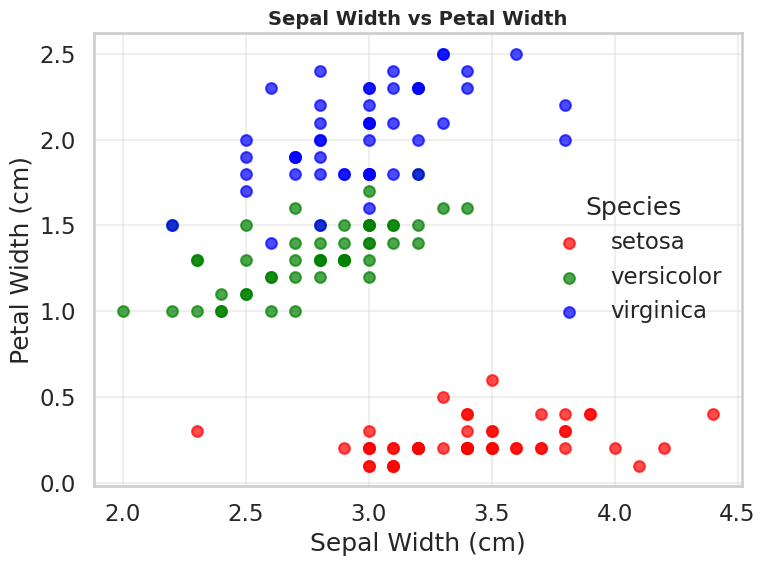

In [27]:
#3D visualization (2D projection)
plt.figure(figsize=(8, 6))

colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(
        species_data['SepalWidthCm'],
        species_data['PetalWidthCm'],
        alpha=0.7,
        s=60,
        label=species.replace('Iris-', ''),
        color=colors.get(species, 'gray')
    )

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width',
          fontsize=14, fontweight='bold')
plt.legend(title='Species')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Data Preparation for Machine Learning**

In [31]:
# Create a copy for ML processing
df_ml = df.copy()

In [32]:
# Encode target variable
print("🔤 ENCODING CATEGORICAL VARIABLES...")
label_encoder = LabelEncoder()
df_ml['Species_Encoded'] = label_encoder.fit_transform(df_ml['Species'])
species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Species encoding mapping: {species_mapping}")

🔤 ENCODING CATEGORICAL VARIABLES...
Species encoding mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [34]:
df_ml.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


In [36]:
# Feature selection
print("\n🎯 SELECTING FEATURES...")
X = df_ml[numeric_cols]  # Features
y = df_ml['Species_Encoded']  # Target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")


🎯 SELECTING FEATURES...
Features shape: (150, 4)
Target shape: (150,)
Number of features: 4
Number of classes: 3


In [37]:
# Feature scaling
print("\n📏 APPLYING FEATURE SCALING...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
print("✅ Features scaled using StandardScaler")


📏 APPLYING FEATURE SCALING...
✅ Features scaled using StandardScaler


In [39]:
# Train-test split
print("\n🎯 CREATING TRAIN-TEST SPLIT...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")
print(f"Classes in training: {np.unique(y_train)}")
print(f"Classes in test: {np.unique(y_test)}")


🎯 CREATING TRAIN-TEST SPLIT...
Training set: 120 samples (80.0%)
Test set: 30 samples (20.0%)
Features: 4
Classes in training: [0 1 2]
Classes in test: [0 1 2]


In [41]:
# Feature correlation after scaling
print("\n📊 FEATURE CORRELATION AFTER SCALING:")
corr_scaled = pd.DataFrame(X_scaled, columns=numeric_cols).corr()
print(corr_scaled.round(3))


📊 FEATURE CORRELATION AFTER SCALING:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm          1.000        -0.109          0.872         0.818
SepalWidthCm          -0.109         1.000         -0.421        -0.357
PetalLengthCm          0.872        -0.421          1.000         0.963
PetalWidthCm           0.818        -0.357          0.963         1.000


**Machine Learning Model**

In [42]:
# Initialize models with different parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42),
    'SVM Linear': SVC(kernel='linear', C=1.0, random_state=42),
    'SVM RBF': SVC(kernel='rbf', gamma='scale', random_state=42)
}

In [43]:
# Dictionary to store results
results = {}
model_details = []

print("\n🔧 TRAINING MODELS...")
print("-"*40)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_scaled_df, y, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # Store details for DataFrame
    model_details.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })
    
    print(f"  • Train Accuracy: {train_accuracy:.4f}")
    print(f"  • Test Accuracy: {test_accuracy:.4f}")
    print(f"  • F1-Score: {f1:.4f}")
    print(f"  • CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Create results DataFrame
results_df = pd.DataFrame(model_details)
results_df_sorted = results_df.sort_values('Test Accuracy', ascending=False)

print("\n" + "="*50)
print("🏆 MODEL PERFORMANCE COMPARISON")
print("="*50)
print(results_df_sorted.round(4).to_string(index=False))


🔧 TRAINING MODELS...
----------------------------------------

Training Logistic Regression...
  • Train Accuracy: 0.9500
  • Test Accuracy: 0.9000
  • F1-Score: 0.8997
  • CV Accuracy: 0.9267 (±0.0573)

Training Decision Tree...
  • Train Accuracy: 0.9917
  • Test Accuracy: 0.9000
  • F1-Score: 0.8997
  • CV Accuracy: 0.9533 (±0.0340)

Training K-Nearest Neighbors...
  • Train Accuracy: 0.9667
  • Test Accuracy: 0.9333
  • F1-Score: 0.9327
  • CV Accuracy: 0.9533 (±0.0340)

Training Random Forest...
  • Train Accuracy: 1.0000
  • Test Accuracy: 0.9333
  • F1-Score: 0.9333
  • CV Accuracy: 0.9667 (±0.0211)

Training SVM Linear...
  • Train Accuracy: 0.9750
  • Test Accuracy: 1.0000
  • F1-Score: 1.0000
  • CV Accuracy: 0.9667 (±0.0298)

Training SVM RBF...
  • Train Accuracy: 0.9750
  • Test Accuracy: 0.9667
  • F1-Score: 0.9666
  • CV Accuracy: 0.9667 (±0.0211)

🏆 MODEL PERFORMANCE COMPARISON
              Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score  CV Mean  CV

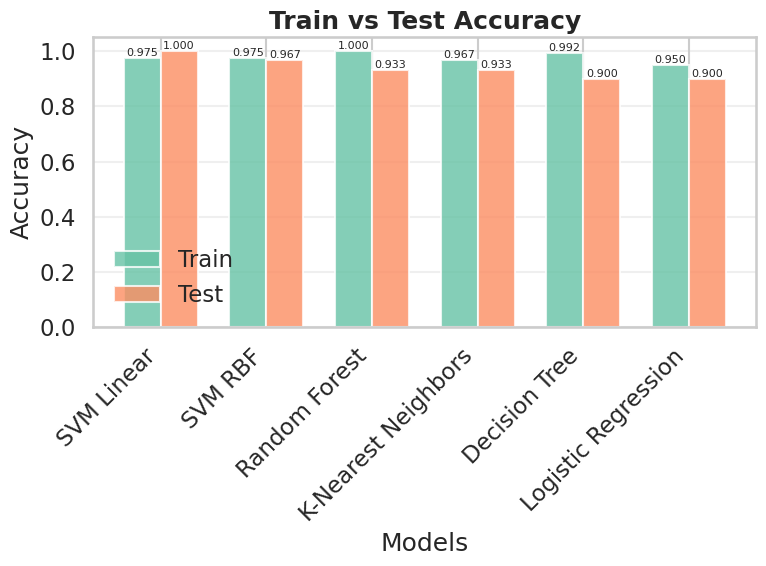

In [45]:
#MODEL PERFORMANCE VISUALIZATION
#Train vs Test Accuracy
plt.figure(figsize=(8, 6))

x_pos = np.arange(len(results_df_sorted))
width = 0.35

bars1 = plt.bar(
    x_pos - width/2,
    results_df_sorted['Train Accuracy'],
    width,
    label='Train',
    alpha=0.8
)

bars2 = plt.bar(
    x_pos + width/2,
    results_df_sorted['Test Accuracy'],
    width,
    label='Test',
    alpha=0.8
)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy', fontweight='bold')
plt.xticks(x_pos, results_df_sorted['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(alpha=0.3, axis='y')

# Value labels
for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{bar.get_height():.3f}",
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


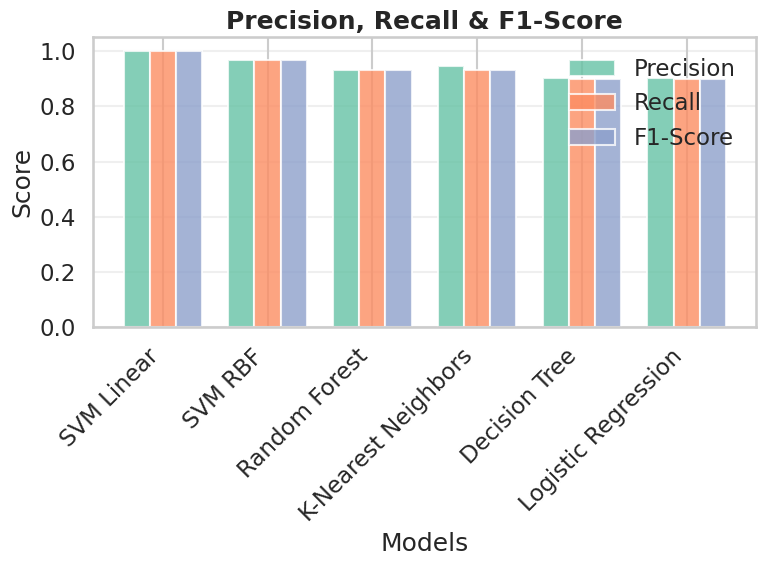

In [46]:
#Precision, Recall & F1-Score Comparison
plt.figure(figsize=(8, 6))

metrics = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df_sorted))
width = 0.25

for i, metric in enumerate(metrics):
    plt.bar(
        x + (i - 1) * width,
        results_df_sorted[metric],
        width,
        label=metric,
        alpha=0.8
    )

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision, Recall & F1-Score', fontweight='bold')
plt.xticks(x, results_df_sorted['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

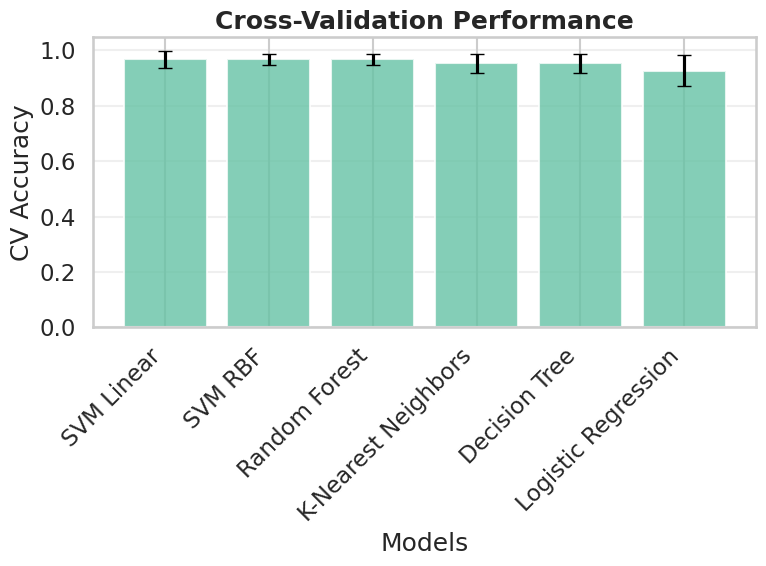

In [47]:
#Cross-Validation Performance
plt.figure(figsize=(8, 6))

x_pos = np.arange(len(results_df_sorted))

plt.bar(
    x_pos,
    results_df_sorted['CV Mean'],
    yerr=results_df_sorted['CV Std'],
    capsize=5,
    alpha=0.8
)

plt.xlabel('Models')
plt.ylabel('CV Accuracy')
plt.title('Cross-Validation Performance', fontweight='bold')
plt.xticks(x_pos, results_df_sorted['Model'], rotation=45, ha='right')
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


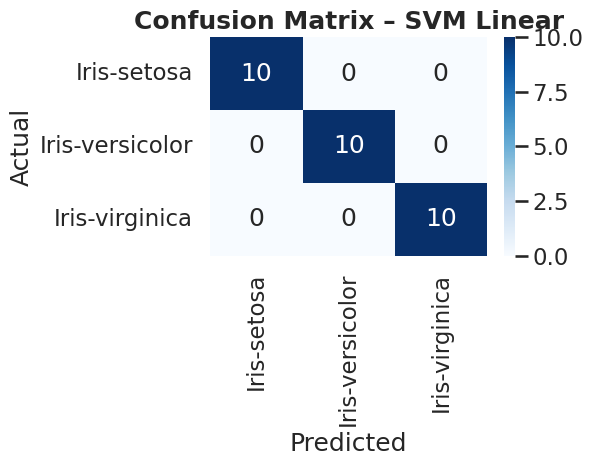

In [48]:
#Confusion Matrix (Best Model)
best_model_name = results_df_sorted.iloc[0]['Model']
best_model_results = results[best_model_name]

cm = confusion_matrix(y_test, best_model_results['y_pred'])

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix – {best_model_name}', fontweight='bold')

plt.tight_layout()
plt.show()


**Model Deployment & Export**

In [53]:
import joblib
import json
from datetime import datetime
import os

# Create output directory
output_dir = 'iris_model_deployment'
os.makedirs(output_dir, exist_ok=True)

print(f"\n📁 Creating output directory: {output_dir}")

# 1. Save the best model
print("\n💾 SAVING THE BEST MODEL...")
best_model_path = os.path.join(output_dir, 'best_model.pkl')
joblib.dump(best_model_name, best_model_path)
print(f"✅ Best model saved: {best_model_path}")


📁 Creating output directory: iris_model_deployment

💾 SAVING THE BEST MODEL...
✅ Best model saved: iris_model_deployment/best_model.pkl


**Done**